In [1]:
import numpy
import torch
from torchtext.vocab import GloVe
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

# Load pre-trained Word2Vec embeddings(GloVe)
word_embeddings = GloVe(name='6B', dim=300)

.vector_cache/glove.6B.zip: 862MB [04:53, 2.94MB/s]                                                                                                                                                         
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 399999/400000 [00:21<00:00, 18707.79it/s]


In [3]:

vector_apple = word_embeddings["apple"]
vector_fruit = word_embeddings["fruit"]
vector_car = word_embeddings["car"]

similarity_score_af = torch.nn.functional.cosine_similarity(vector_apple, vector_fruit, dim=0)
similarity_score_ac = torch.nn.functional.cosine_similarity(vector_apple, vector_car, dim=0)
similarity_score_cf = torch.nn.functional.cosine_similarity(vector_car, vector_fruit, dim=0)

print(f"Similarity score between 'apple' and 'fruit': {similarity_score_af.item()}")
print(f"Similarity score between 'apple' and 'car': {similarity_score_ac.item()}")
print(f"Similarity score between 'car' and 'fruit': {similarity_score_cf.item()}")


Similarity score between 'apple' and 'fruit': 0.4375605583190918
Similarity score between 'apple' and 'car': 0.1332862377166748
Similarity score between 'car' and 'fruit': 0.1191381961107254


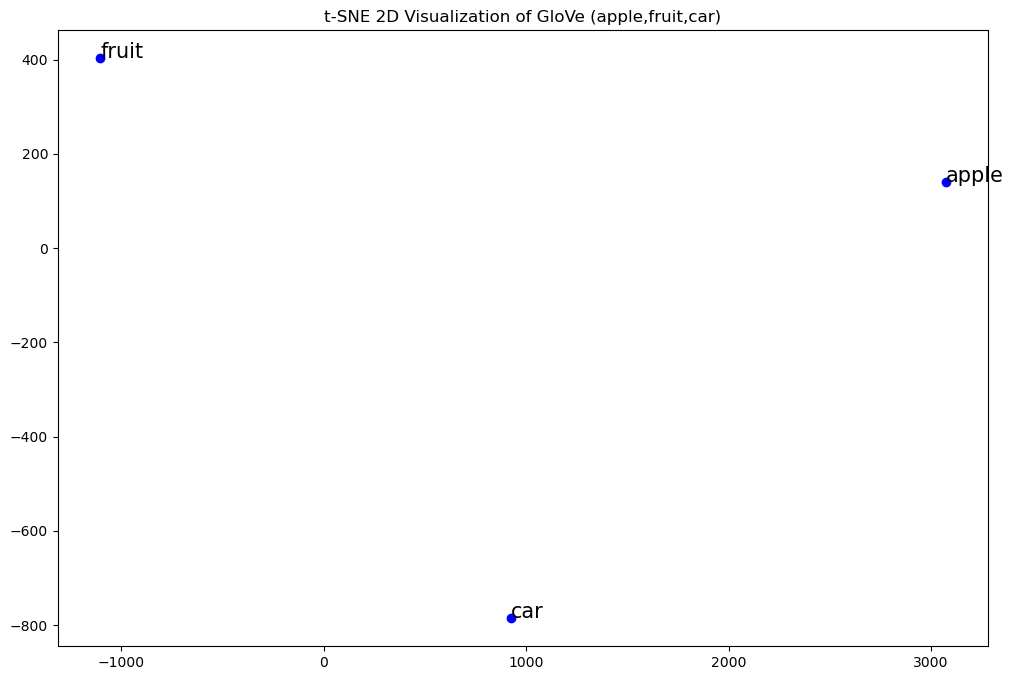

In [4]:
desired_words = [vector_apple.numpy(),vector_fruit.numpy(),vector_car.numpy()]
vectors = numpy.array(desired_words)

tsne = TSNE(n_components=2, random_state=42, perplexity=2)
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', color='b')

# Annotate points with words
for i, word in enumerate(["apple","fruit","car"]):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=15)

plt.title('t-SNE 2D Visualization of GloVe (apple,fruit,car)')
# plt.savefig("images/t-sne_word_embedding.png",dpi=100)
plt.show()

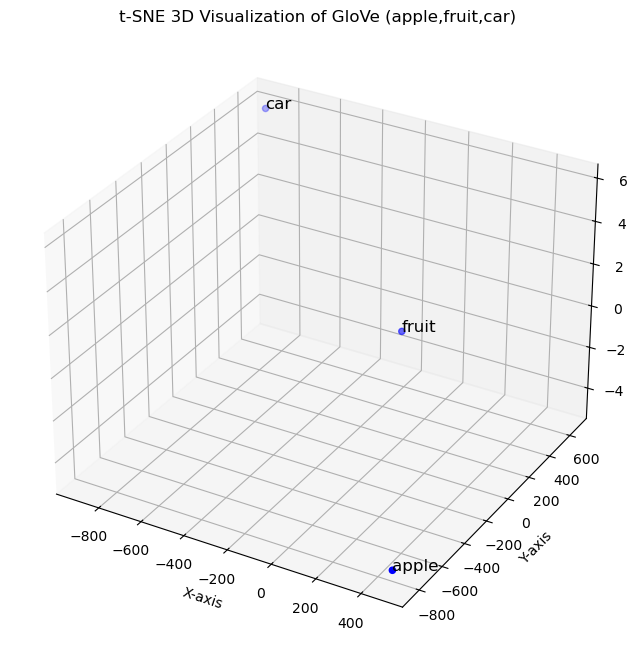

In [7]:
desired_words = [vector_apple.numpy(),vector_fruit.numpy(),vector_car.numpy()]
vectors = numpy.array(desired_words)

tsne = TSNE(n_components=3, random_state=42, perplexity=2)
vectors_3d = tsne.fit_transform(vectors)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2], marker='o', color='b')

# Annotate points with words
for i, word in enumerate(["apple","fruit","car"]):
    ax.text(vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2], word, fontsize=12)
    #plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=15)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('t-SNE 3D Visualization of GloVe (apple,fruit,car)')
# plt.savefig("images/t-sne_word_embedding.png",dpi=100)
plt.show()

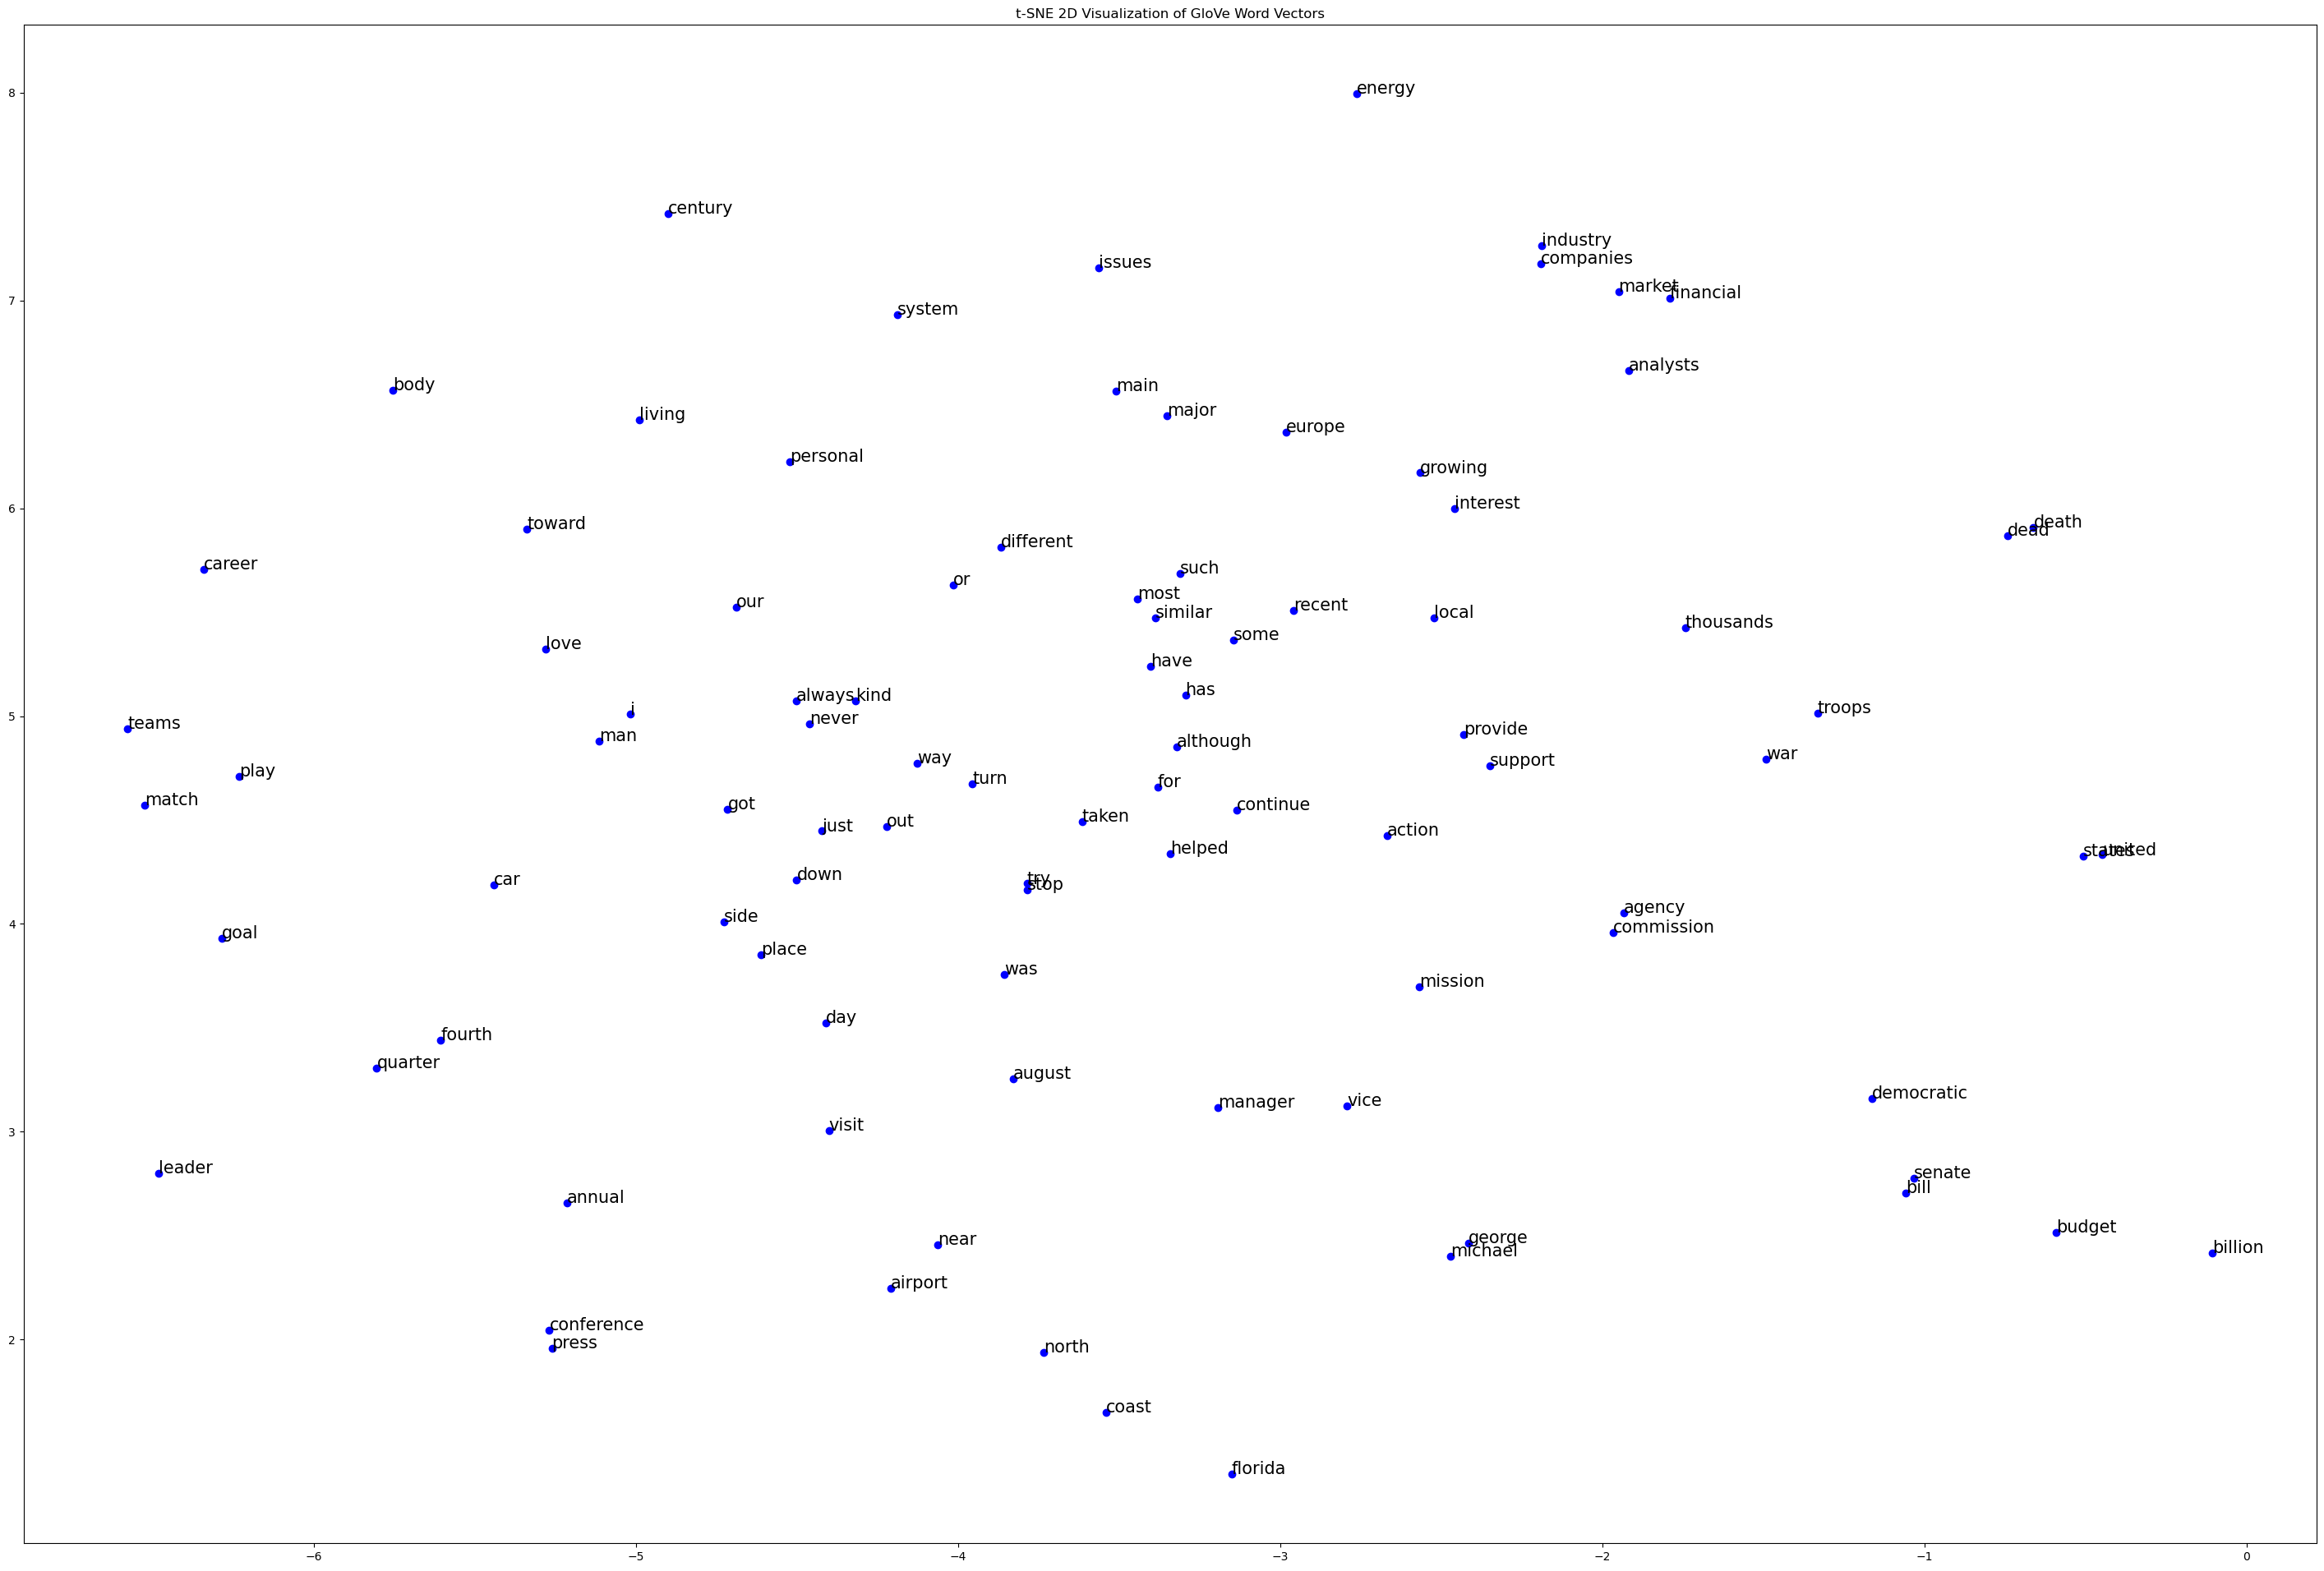

In [9]:
# get 100 random words from the first 1000 words (in corpus)
words = random.sample(list(word_embeddings.stoi.keys())[:1000], 100)
alpha_words = [word for word in words if word.isalpha()]   # take only strings that have alhapebtical characters
vectors = numpy.array([word_embeddings[word].numpy() for word in alpha_words])

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Plot the 2D vectors
plt.figure(figsize=(36, 24))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', color='b')

# Annotate points with words
for i, word in enumerate(alpha_words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=15)

plt.title('t-SNE 2D Visualization of GloVe Word Vectors')
# plt.savefig("images/t-sne_word_embedding.png",dpi=100)
plt.show()

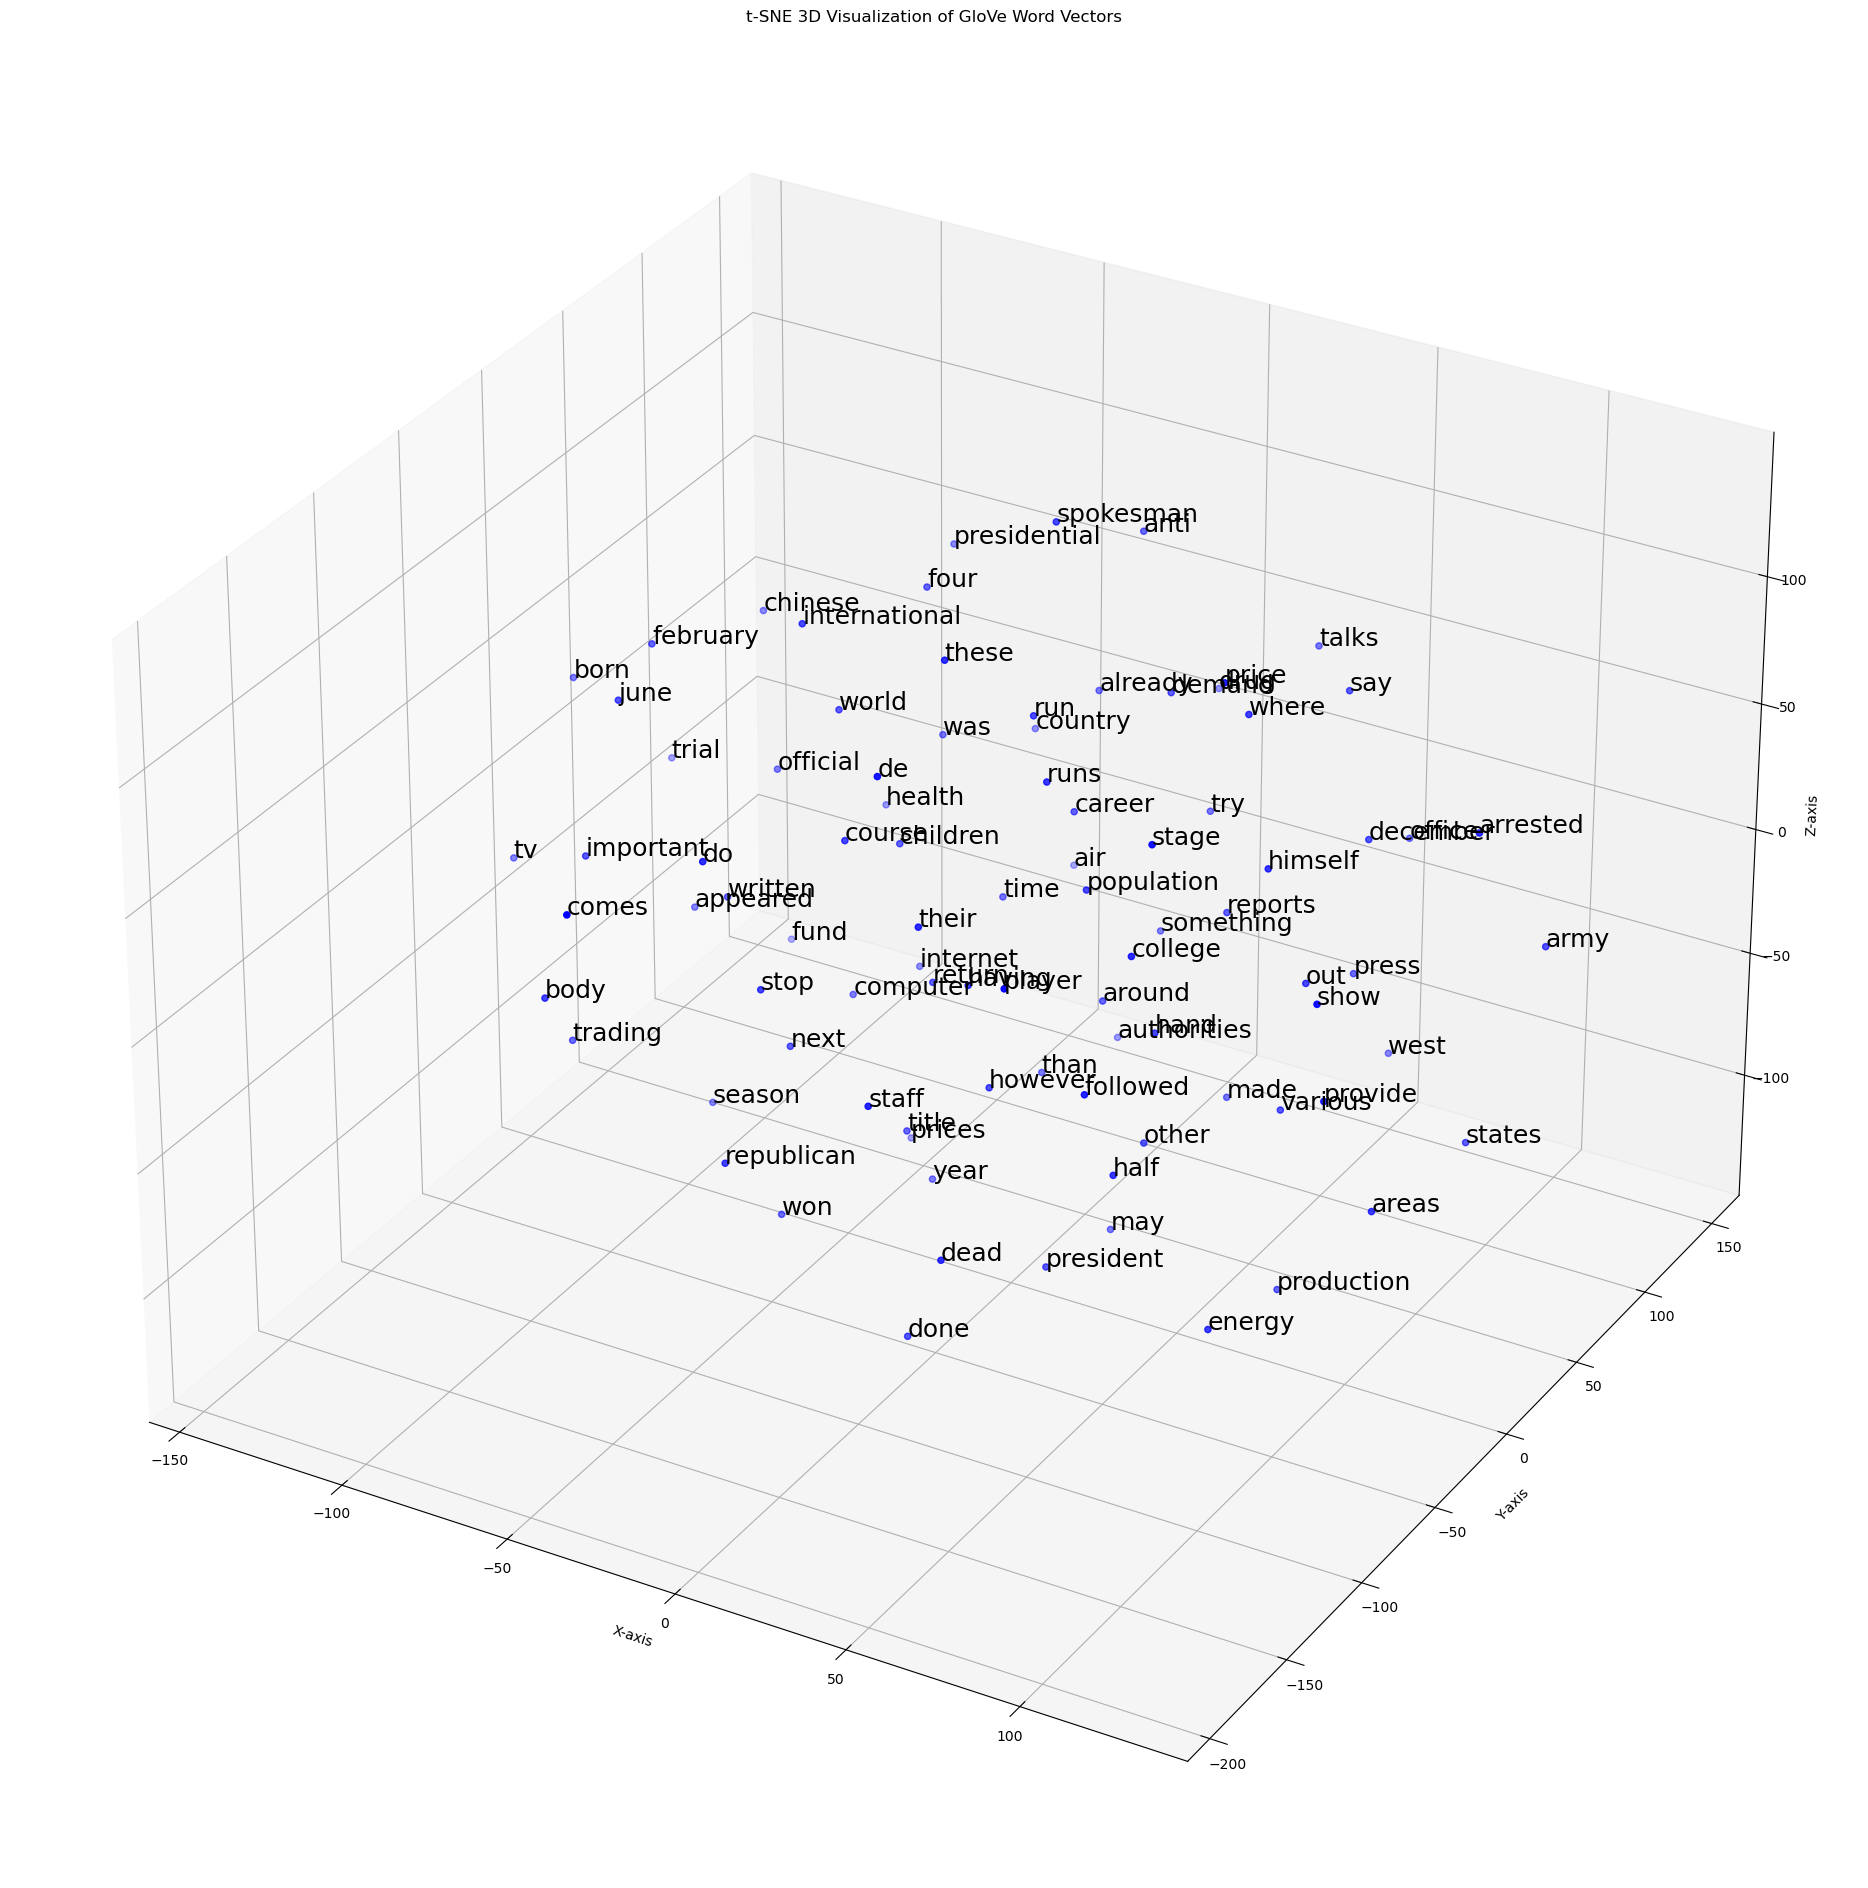

In [10]:
# get 100 random words from the first 1000 words (in corpus)
words = random.sample(list(word_embeddings.stoi.keys())[:1000], 100)
alpha_words = [word for word in words if word.isalpha()]   # take only strings that have alhapebtical characters
vectors = numpy.array([word_embeddings[word].numpy() for word in alpha_words])

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
vectors_3d = tsne.fit_transform(vectors)

fig = plt.figure(figsize=(36, 24))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2], marker='o', color='b')

# Annotate points with words
for i, word in enumerate(alpha_words):
    ax.text(vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2], word, fontsize=18)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('t-SNE 3D Visualization of GloVe Word Vectors')
plt.show()